# **DS501 Class Project**
**Authors:** Daniel Alvarado Segura and Jun Lee

**Code repository:** https://github.com/Dasikio/DS501_Project.git

**Description**: In this project we plan to merge two data sets which include housing selling prices for California. With this new merged data set we will be able to find a much more refined image of the house market in the area of California. 

**Data Sets**: We will use two open source data sets which inlcude information about the housing market of the area of California. The first set contains information of the houses per quadrant based on longitude and latitude. The second set has information of specific houses and their specific address. Below is a basic analysis of each dataset.

**Dataset 1 analysis:** This data set has a total of 20640 rows of data and 10 columns total. Of this dataset the data we are most interested in are the coordinates(longitude/latitude), median_house_value and households.

In [8]:
import pandas as pd
#Features and sample data of data set 1 (number of elements is shown below)
data_set1 = pd.read_csv("California_House_Info.csv")
data_set1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
data_set1.shape

(20640, 10)

**Dataset 2 analysis:** This data set is divided in 2, but has a total of 79,065 rows of data and 41 columns total. Of this dataset the data we are most interested in are the address to get the coordinates, year built, last sold price and the distance from schools.

In [9]:
import pandas as pd
#Features and sample data of data set 2 (number of elements is shown below)
data_set2 = pd.read_csv("train.csv")
data_set2.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [12]:
data_set2.shape

(47439, 41)

# **Data Loading and Cleaning**
**Process:** To be able to merge this two data bases we must first clean the data by dropping any rows with key information such as its address/location and house features such as number of rooms and proximity to the coast. Additionally, the second data set is split between a training set and a testing set. We will concatenate the contents of these two, to then be able to merge it with the first data set. Additionally, for the purpose of finding the information we want we will drop any rows with data that do not belong to the counties of Los Angeles, San Diego, Orange, Riverside, and San Bernardino.

**Framework:** Our data processing framework is composed of 4 main components, and depending on the dataset we may add others. Here is a small explanation of the main components:

1. Required data definition (main funtion): The way our data processing/cleaning works is we specify which counties we want informatio from. Furthermore, in case you have a set that was divided in subsets, we can put them back together (assuming they have the same features) and specify which features to be used to compare with the other database. 

2. Set completion (complete_set# function): In this function we do the preliminary data cleaning necesary to execute the next 2 main components. This is tailored to our datasets, but it can easily be changed as it is it's own function.

3. Find county (get_county funtion): With this function we utilize Geocoding to find the county each row of data belongs to. This allows us to filter out data from counties we don't want to analyze. In the case of the second dataset there is an additional step before this one, which is get_coordinates that finds the longitude and latitude of each address to then use this fucntion.

4. County Filter (county_filter funtion): This function drops rows from counties we don't want to analyze. Said counties are decided beforehand and are provided to the function via a dictionary. 

**Functions:**

In [1]:
#Necesary modules
import pandas as pd
import requests
from matplotlib import pyplot as plt

C:\Users\danie\AppData\Local\Temp\ipykernel_38292\3869539251.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Function to get county from geocode
def get_county(latitude, longitude):
    try:
        geocode_api = f"https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={longitude}&y={latitude}&benchmark=Public_AR_Census2020&vintage=Census2020_Census2020&layers=6&format=json"
        response = requests.get(geocode_api)
        response.raise_for_status()  # Raise an exception for 4xx or 5xx status codes
        geocode_api_data = response.json()
        county_code = geocode_api_data['result']['geographies']['Census Tracts'][0]['COUNTY']
        return county_code
    except (requests.RequestException, KeyError, IndexError) as e:
        print(f"Error occurred for coordinates ({longitude}, {latitude}): {str(e)}")
        return None

In [3]:
#Function to filter data from wanted counties
def county_filter(filtered_data, county_names):
    # Iterate over each county code in the 'county' column
    indices_to_drop = []  # List to store indices of rows to drop
    for index, county_code in filtered_data['county'].items():
        # Check if the county code exists in the dictionary keys
        if county_code in county_names:
            # Replace the county code with the corresponding county name
            filtered_data.at[index, 'county'] = county_names[county_code]
        else:
            # Add the index to the list of indices to drop
            indices_to_drop.append(index)

        # Drop rows with indices from the list and round values
        filtered_data.drop(indices_to_drop, inplace=True)
    return filtered_data

In [4]:
# Function to get geocode (longitude and latitude) from address
def get_coordinates(address, city, zip_code, state):
    # Format the address for the API request
    formatted_address = f"{address.replace(' ', '+')},+{city.replace(' ', '+')},+{state}+{zip_code}"
    formatted_address = formatted_address.replace('#','')
    geocoding_url = f"https://geocoding.geo.census.gov/geocoder/locations/onelineaddress?address={formatted_address}&benchmark=2020&format=json"
    
    try:
        response = requests.get(geocoding_url)
        response.raise_for_status()  # Raise an exception for 4xx or 5xx status codes
        geocoding_data = response.json()
        
        # Extract latitude and longitude from the API response
        if 'result' in geocoding_data and 'addressMatches' in geocoding_data['result'] and len(geocoding_data['result']['addressMatches']) > 0:
            latitude = geocoding_data['result']['addressMatches'][0]['coordinates']['y']
            longitude = geocoding_data['result']['addressMatches'][0]['coordinates']['x']
            return latitude, longitude
        else:
            return None, None
    except requests.RequestException as e:
        print(f"Error occurred while getting geocode for address {formatted_address}: {e}")
        return None, None

In [5]:
#Function to aggregate desired columns in dataset 2 such that we can have the average/sum of values per repeated coordinate (longitude/latitudce)
def data_aggregation(full_data,aggregation_functions):
    mod_full_data = full_data.groupby(['longitude', 'latitude']).agg(aggregation_functions).reset_index()

**Data Loading of First Data Set**

In [ ]:
#Function to process a dataSet
def complete_set1(file_path):
    coordinate_based_data = pd.read_csv(file_path)
    cleaned_coordinate_based_data = coordinate_based_data.dropna(subset=['longitude', 'latitude'])
    filtered_data = cleaned_coordinate_based_data[(cleaned_coordinate_based_data['longitude'] > -118.96) &
                                                  (cleaned_coordinate_based_data['latitude'] < 35.82)]

    duplicate_coords = filtered_data.groupby(['longitude', 'latitude']).size() > 1
    for coords, is_duplicate in duplicate_coords.items():
        if is_duplicate:
            avg_values = filtered_data.loc[(filtered_data['longitude'] == coords[0]) &
                                           (filtered_data['latitude'] == coords[1])].select_dtypes(include='number').mean()
            for col in avg_values.index:
                filtered_data.loc[(filtered_data['longitude'] == coords[0]) &
                                  (filtered_data['latitude'] == coords[1]), col] = avg_values[col]
    filtered_data.drop_duplicates(subset=['longitude', 'latitude'], keep='first', inplace=True)

    return filtered_data

#File path to dataSet
file_path = "local_path/California_House_Info.csv"

# Define County codes wanted
county_names = {
    '037': 'Los Angeles',
    '073': 'San Diego',
    '059': 'Orange',
    '065': 'Riverside',
    '071': 'San Bernardino'
}
#Load and Clean data for merging
cleaned_dataset1 = complete_set1(file_path)
cleaned_dataset1['county'] = cleaned_dataset1.apply(lambda row: get_county(row['latitude'], row['longitude']), axis=1)
cleaned_dataset1 = county_filter(cleaned_dataset1, county_names)

cleaned_dataset1.to_csv('cleaned_dataset1.csv', index=False)
print(cleaned_dataset1)



**Data Loading of Second Data Set**

In [ ]:
def complete_set2(susbset_list):
    full_data = pd.DataFrame()
    for idx, file_name in enumerate(susbset_list):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_name)
        if idx == 0:
            full_data = df
        else:
            full_data = pd.concat([full_data, df], ignore_index=True)

    # Clean the DataFrame
    full_data = full_data.dropna(subset=['Address', 'Bedrooms'])

    #Get coordinates (Longitude and Latitude)
    full_data['latitude'], full_data['longitude'] = zip(*full_data.apply(lambda row: get_coordinates(row['Address'], row['City'], row['Zip'], row['State']), axis=1))
    full_data['latitude'] = full_data['latitude'].round(2)
    full_data['longitude'] = full_data['longitude'].round(2)

    #Get counties
    full_data['county'] = full_data.apply(lambda row: get_county(row['latitude'], row['longitude']), axis=1)

    return full_data

def clean_set2(full_data, county_names, aggregation_functions):
    filtered_data = county_filter(full_data,county_names)
    cleaned_dataset2 = data_aggregation(full_data,aggregation_functions)

    return cleaned_dataset2



# List of subsets to join for dataSet
subset_list = ['train.csv', 'test.csv']

# Define County codes wanted
county_names = {
    '037': 'Los Angeles',
    '073': 'San Diego',
    '059': 'Orange',
    '065': 'Riverside',
    '071': 'San Bernardino'
}

# Agregate data for merging
# Define aggregation dictionary for desired columns
aggregation_functions = {
    'Sold Price': 'mean',  # Average price of homes - Use mean to get average of values in same area
    'Year built': 'mean',
    'Bedrooms': 'sum',  # Total number of bedrooms - Use sum to add values in same area
    'Bathrooms': 'sum',
    'Full bathrooms': 'sum',
    'Total interior livable area': 'mean', #Average house area
    'Elementary School Distance': 'mean', # Average distance to schools
    'Middle School Distance': 'mean', # Average distance to schools
    'High School Distance': 'mean', # Average distance to schools
    'Last Sold Price': 'mean'  #Average house price
}

# Get complete set 2 (join subsets, find coordinates and counties)
full_data = complete_set2(subset_list)

# Clean data
cleaned_dataset2 = clean_set2(full_data, county_names)

#Save csv of completed processed data set to current directory
cleaned_dataset2.to_csv('cleaned_dataset2.csv', index=False)
print(cleaned_dataset2)

# Merging

**Merging of datasets:** Now to get the information we want from both sets, we are gonna merge them based on longitude and latitude. This way we are gonna be left with the content of dataset1, which is the old data of the California housing market, lined up with the content of the second dataset which is the new data of the california housing market.

**Merged data analysis:** As it can be seen the merged data has a total of 3168 entries. This is bececause we groupd all data that was for the same coordinate (longitude/latitude), and filtered out data that was not from Los Angeles, San Diego, Orange, Riverside, and San Bernardino. All columns after the ocean_proximity column are from the second dataset. Furthermore, as we only merged the columns we needed from the second set we only added 10 columns rather than all 41 that originally belonged to the dataset. 

Disclaimer: For purposes of this notebook we are loading the processed data to show the visualizations. 

In [14]:
cleaned_dataset1 = pd.read_csv("set1_filtered_data.csv")
cleaned_dataset2 = pd.read_csv("set2_filtered_data.csv")

# Drop rows with missing values in the 'Last Sold Price' column from the second set
cleaned_dataset2.dropna(subset=['Last Sold Price'], inplace=True)

# Divide Last Sold Price by 10 for values that are over 6 digits (due to signicant figures errors in data input)
cleaned_dataset2.loc[cleaned_dataset2['Last Sold Price'] >= 1000000, 'Last Sold Price'] /= 10


merged_df = pd.merge(cleaned_dataset1, cleaned_dataset2, on=['longitude', 'latitude'], how='inner')

merged_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,Sold Price,Year built,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Elementary School Distance,Middle School Distance,High School Distance,Last Sold Price
0,-118.28,34.26,32.0,1079.0,207.0,486.0,167.0,4.98330,213000.0,<1H OCEAN,...,NaN,1955.500000,20,13.0,12.0,1848.333333,0.400000,1.383333,0.966667,372500.0
1,-118.29,34.26,33.0,3177.0,713.0,1845.0,612.0,4.00800,191100.0,<1H OCEAN,...,NaN,1928.000000,9,5.0,3.0,943.500000,0.466667,0.975000,0.500000,345000.0
2,-118.30,34.26,38.0,1845.6,413.8,1064.0,386.0,3.86458,187880.0,<1H OCEAN,...,NaN,1946.714286,19,12.0,10.0,1206.571429,0.250000,0.714286,0.328571,267500.0
3,-118.28,34.25,32.0,2302.0,450.0,1526.0,588.0,3.06250,179850.0,<1H OCEAN,...,NaN,1933.750000,10,8.0,5.0,1079.750000,0.350000,1.800000,1.350000,384000.0
4,-118.29,34.25,13.5,3778.0,1054.0,2482.0,950.5,2.77610,168250.0,<1H OCEAN,...,NaN,1990.000000,4,3.0,3.0,2323.000000,0.500000,1.800000,1.300000,775000.0


In [15]:
merged_df.shape

(3168, 21)

# Data Visualization

In here we are finall getting the answers we origianlly set out to answer. This are:

1. Have changes in distance from educational institutions caused an increase on the price of the properties?
2. What is the change in average price of houses per County?
3. Is total interior livable area a significant factor to the increase in house prices? 

**Visualization to answer question 1:**

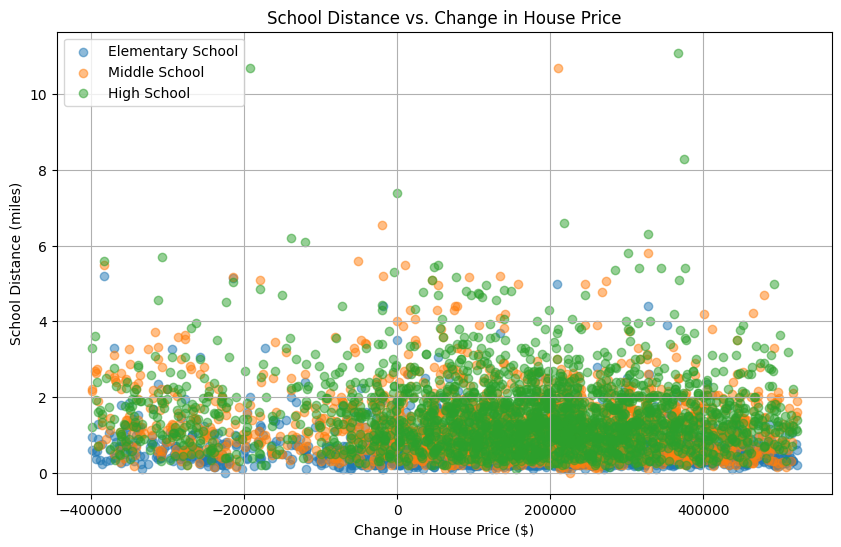

In [16]:
# Calculate the change in house price
merged_df['Price Change'] = merged_df['Sold Price'] - merged_df['median_house_value']

# Calculate the change in house price
merged_df['Price Change'] = merged_df['Last Sold Price'] - merged_df['median_house_value']

# Filter out rows with missing values
filtered_data = merged_df.dropna(subset=['Price Change', 'Elementary School Distance', 'Middle School Distance', 'High School Distance'])

# Define the threshold for outliers
upper_threshold = filtered_data['Price Change'].quantile(0.95)  # Adjust the quantile as needed

# Filter out outliers
filtered_data = filtered_data[filtered_data['Price Change'] <= upper_threshold]

# Plot the School Distance against the Change in House Price
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Price Change'], filtered_data['Elementary School Distance'], alpha=0.5, label='Elementary School')
plt.scatter(filtered_data['Price Change'], filtered_data['Middle School Distance'], alpha=0.5, label='Middle School')
plt.scatter(filtered_data['Price Change'], filtered_data['High School Distance'], alpha=0.5, label='High School')
plt.xlabel('Change in House Price ($)')
plt.ylabel('School Distance (miles)')
plt.title('School Distance vs. Change in House Price')

plt.legend()
plt.grid(True)
plt.show()


This visualization shows the changes in house prices in dolars in the x axis, and the distance form schools. As we can see there is a much higher concentration of educational institucions within 0 to 4 miles in areas where the housing prices have increased. This demonstraits there is a relation between the two. Meaning the increase in schools to those areas could have led to an increase in house prices. This last point is simply a possibility, as there are other factors influence in change of housing prices as well as distribution of educational institucions. 

**Visualization to answer question 2:**

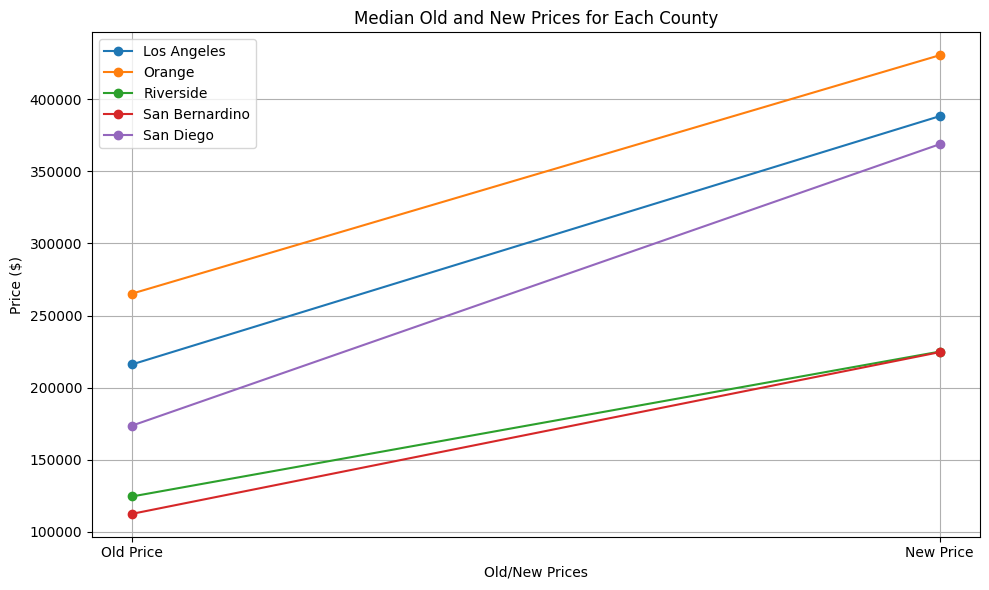

In [17]:
# Calculate the median old and new prices for each county
county_data = filtered_data.groupby('county')
median_old_prices = county_data['median_house_value'].median()
median_new_prices = county_data['Last Sold Price'].median()

# Plot the change from old price to new price for each county
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Plot lines connecting old and new prices for each county
for county, median_old_price, median_new_price in zip(median_old_prices.index, median_old_prices, median_new_prices):
    plt.plot(['Old Price', 'New Price'], [median_old_price, median_new_price], marker='o', label=county)

# Add labels and title
plt.xlabel('Old/New Prices')
plt.ylabel('Price ($)')
plt.title('Median Old and New Prices for Each County')

# Show plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

This graph shows that there has been an increase in house prices in all Counties. The increase varies between counties but overall they mostly share similar rates. 

**Visualization to answer question 3:**

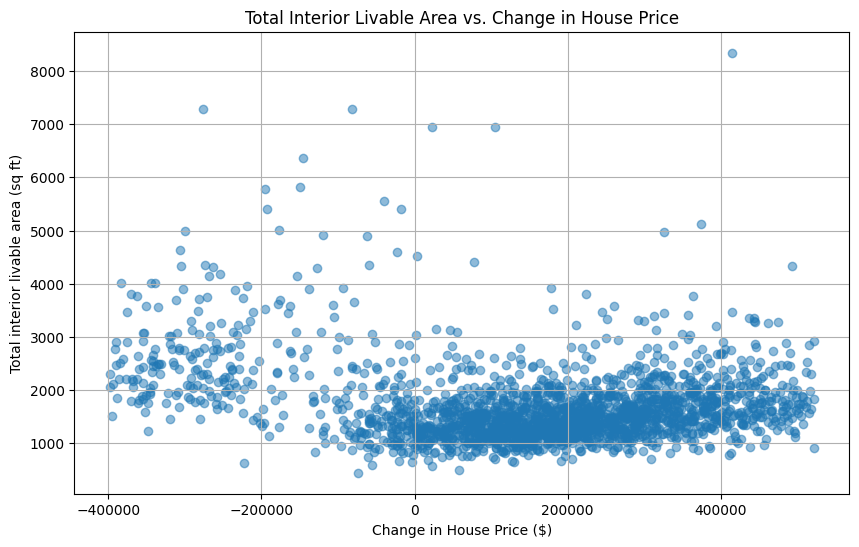

In [18]:
# Plot the Total interior livable area against the Change in House Price
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Price Change'], filtered_data['Total interior livable area'], alpha=0.5)
plt.xlabel('Change in House Price ($)')
plt.ylabel('Total interior livable area (sq ft)')
plt.title('Total Interior Livable Area vs. Change in House Price')

plt.grid(True)
plt.show()

This graph shows that the total interior livable area in squared feet is not a significant factor when it comes to changes in the house prices. It does show a trend that most areas have expirienced an increase in house prices, but it probably isn't highly influenced by the total interior livable area. 